# Graph Lab

## Header information:

  - Author #1: Maged Armanios (armanm5@mcmaster.ca)
  - Author #2: Jinal Sanjula Kasturiarachchi (kasturij@mcmaster.ca)
  - Gitlab URL: https://gitlab.cas.mcmaster.ca/sfwreng-3xb3-fall-22/l1-graph-lab
  - Avenue to Learn group name: Group 32

# Week 1: Manipulating

In week 1, we were tasked with designing an object oriented model for reading and storing data from CSV files. These files contained data regarding the London subway system. Specifically, one file contained information about the stations, one file contained information about the connections and another contained information about the lines.

In [1]:
import sys
from graph.Graph import Graph
from metrics_extractor.MetricsExtractor import MetricsExtractor
from shortest_path.ShortestPath import PathFactory
from graph_builder.GraphBuilder import GraphBuilder
from matplotlib import pyplot as plt


In [2]:
pathToStations = "_dataset/london.stations.csv"
pathToConnections = "_dataset/london.connections.csv"
g = GraphBuilder.build(pathToStations,pathToConnections)


The class GraphBuilder containts the method buildGraph() with two parameters pertaining to the paths of the stations and connections files. This approach to building the graph enables us to add more methods to the class in the case that the CSV file format changes. This makes the graph class indepedant from the graph

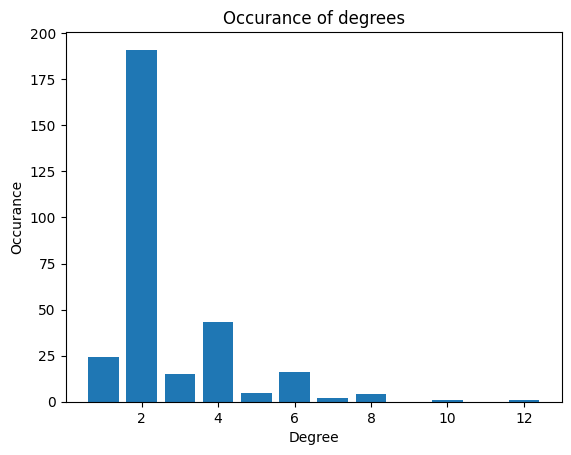

In [3]:
degrees = MetricsExtractor.compute_sum_of_degrees(g)
plt.bar(*zip(*degrees.items()))
plt.title("Occurance of degrees")
plt.xlabel("Degree")
plt.ylabel("Occurance")
plt.show()

Metrics extractor computes different metrics about the graph using various functions. The graph above above shows the occurance of each degree in the graph. It is clear that on average, most stations connect to only two other stations.

The class PathFactory contains multiple methods which all return an itinerary derived using different algorithms. PathFactory.a_star and PathFactory.djikstra return the shortest path as an intinerary given a graph, source, and destination

In [4]:
print("Find the shortest path from 11 to 283\n")
print("Computed with djikstra's algorithm")
pathA = PathFactory.dijkstra(g,11,283)
pathA.printPath()
print("\nComputed with a* algorithm")
pathB = PathFactory.a_star(g,11,283)
pathB.printPath() 

Find the shortest path from 11 to 283

Computed with djikstra's algorithm
Go from 11 to 193 in 6.0 stops with line 1
Go from 193 to 283 in 3.0 stops using line 6

Computed with a* algorithm
Go from 11 to 193 in 6.0 stops with line 1
Go from 193 to 283 in 3.0 stops using line 6


Going from station 11 (Baker Street) to 283 (Westbourne Park) can be done in a total of 9 stops and 2 lines

In [5]:
pathA.path

[[11, 1.0, 1], [163, 2.0, 1], [82, 3.0, 1], [193, 1.0, 6], [218, 2.0, 6]]

The path variable stores every stop along they way, but printPath() only prints other stops when a line change is required. Lines are the third item in the arrays.

### Design Choices
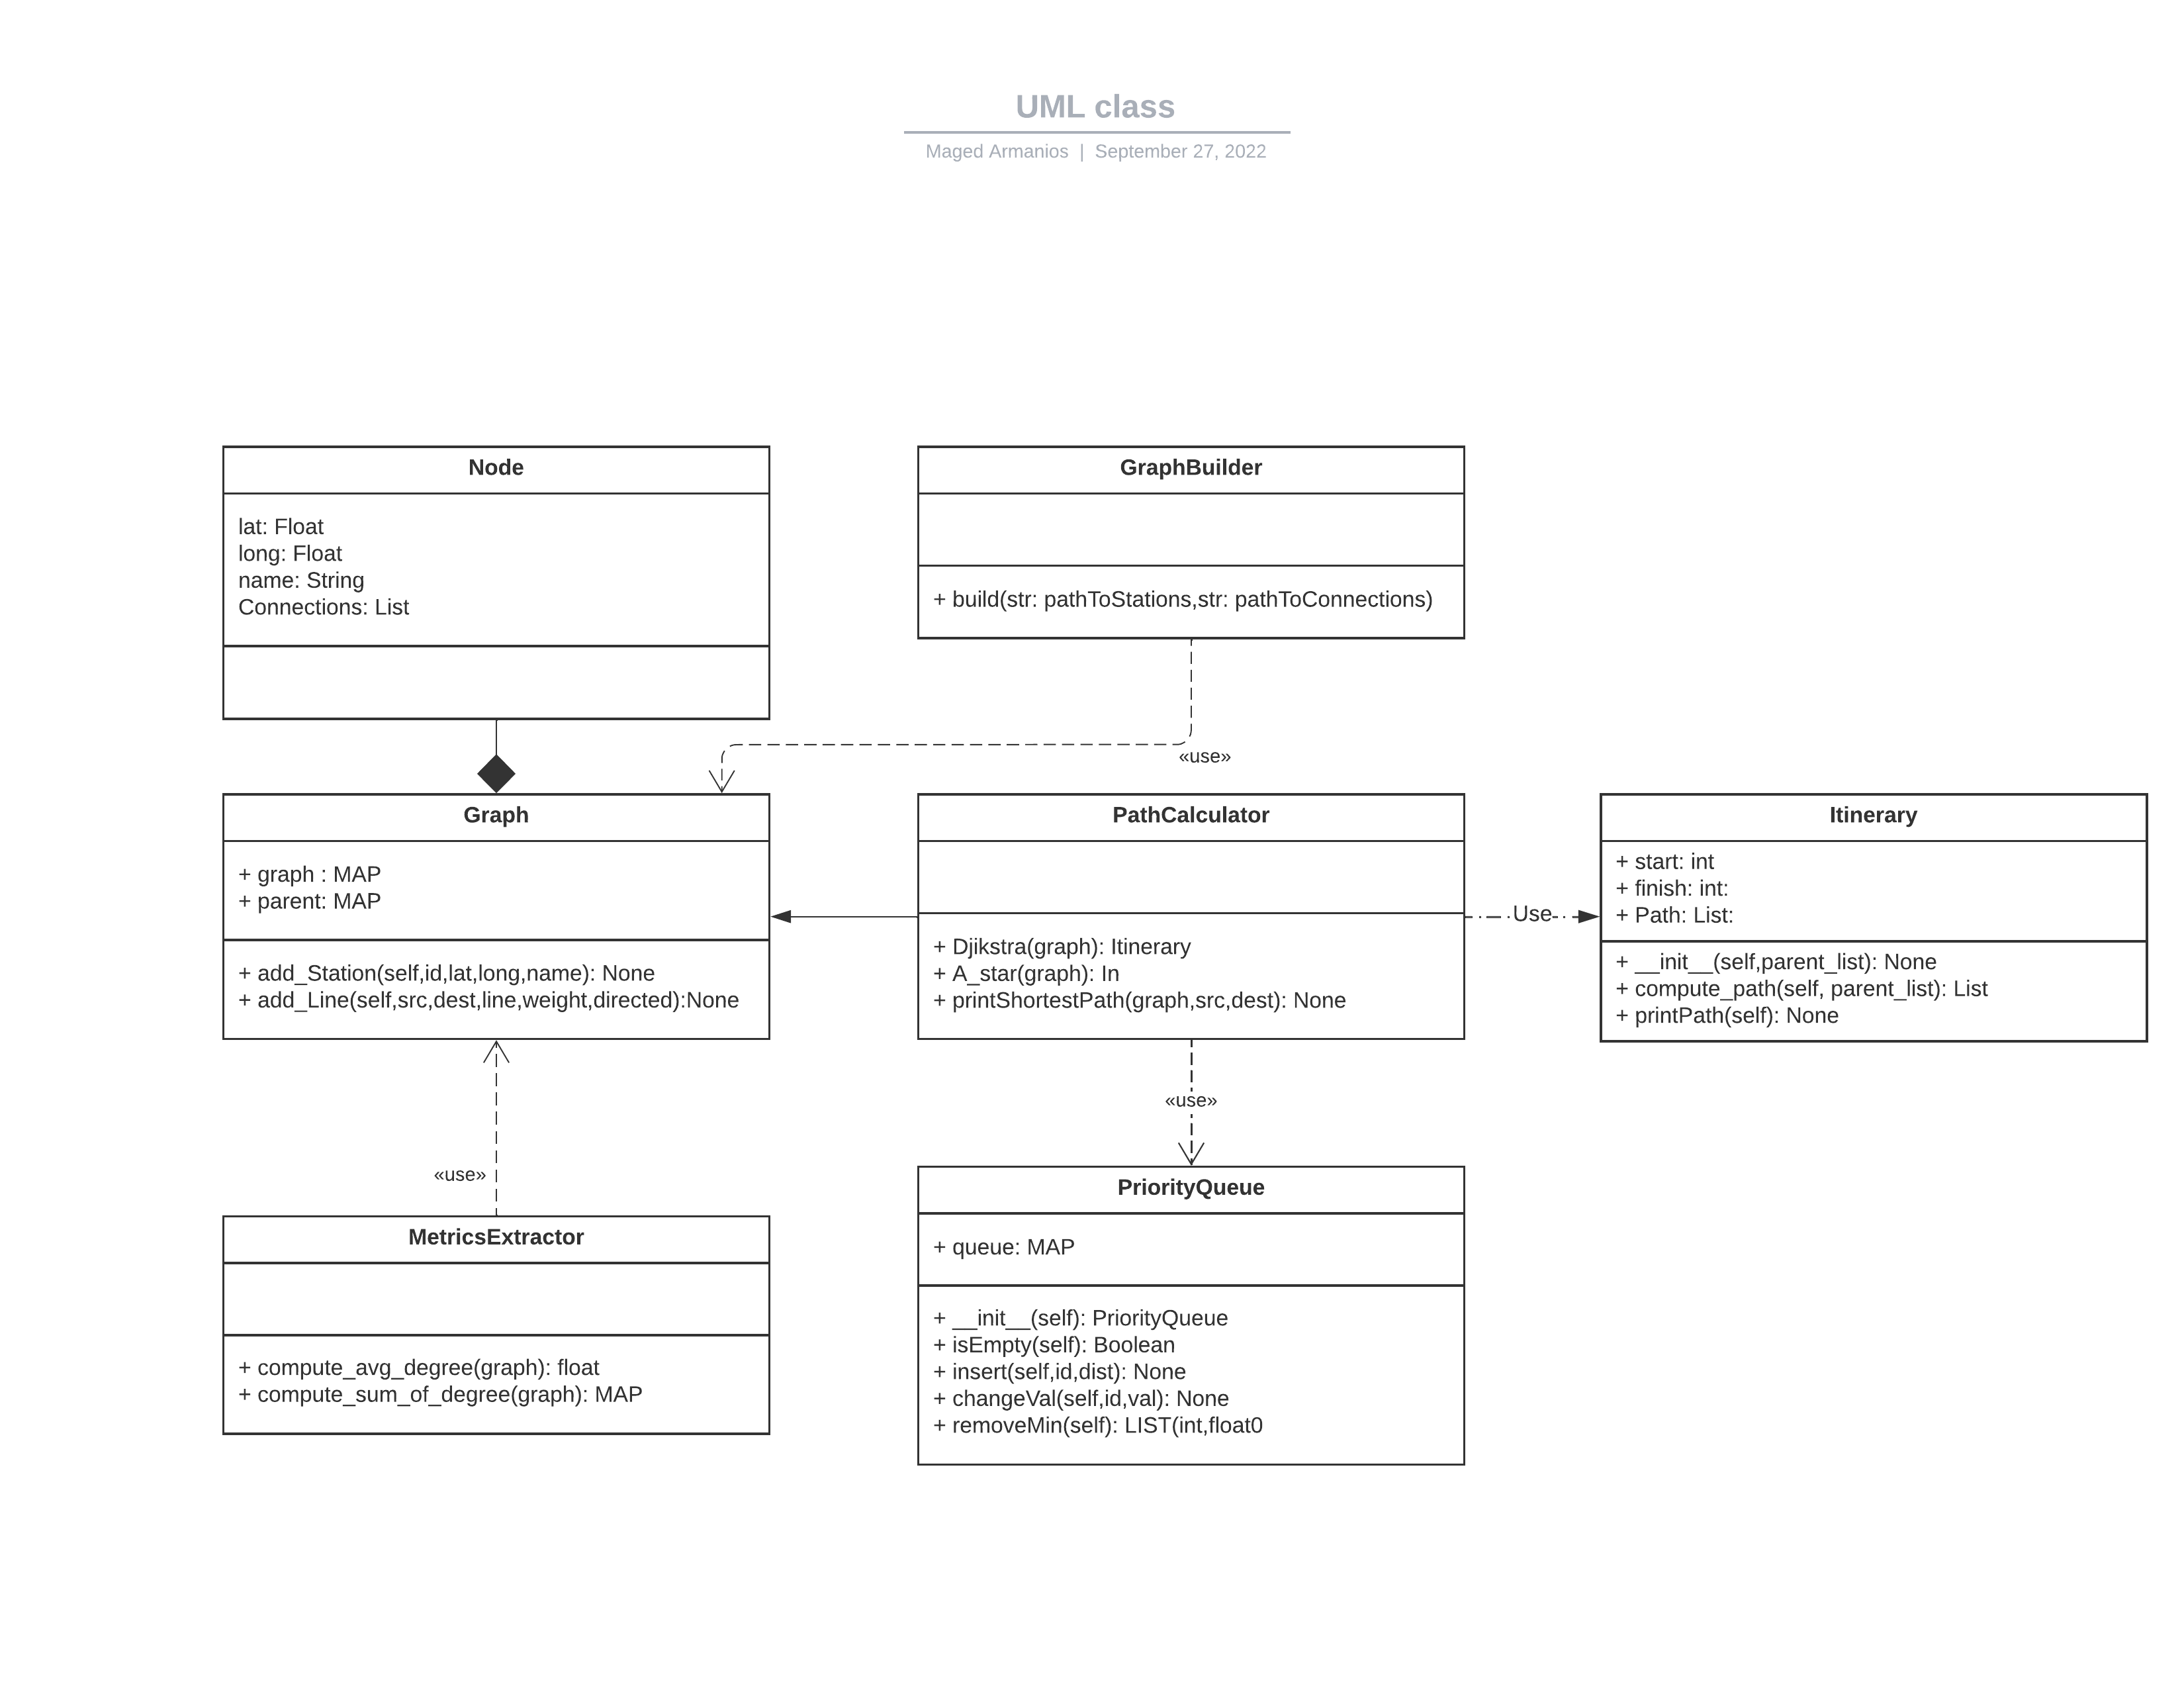

### Explanations and Justifications 

#### GraphBuilder
Seperating GraphBuilder from all other classes was key to ensuring the design is scalable. Now, the graph class is completely independant from the format of the CSV file and if the CSV file is to change we can simply add another method to GraphBuilder that can read it. In summary GraphBuilder enables Graph to be independant of the CSV files and can be adjusted in an open-closed manner.
#### Node
The Node class is what represents the subway stations. It containts all information with the exception of some columns about the zone and rail as they weren't used. Representing each station as an object does use more memory, but enables us to encapsulate the information easily and makes the data at each station easily accessable.
#### Graph
Graph uses nodes to represent the entire subway system in one class. It possess a graph attribute which contains a dictionary (Map) of every station. We used a map instead of an array so that we can accomodate any stationID. Graph also possess the ability to add stations (Nodes) and connections (vertices)
#### MetricsCalculator
MetricsCalculator seperates the functionality of pulling information from the graph from Graph. Each desired function is a public function that can be called as long as a graph is passed in. Additionally, it enables us to create more functions to compute metrics in an open-closed principle without overloading the GraphClass. 
#### PathFactory
PatchFactory is a class that contains all algorithms used for generating itineraries. As of now it contains a method for computing path using Djikstras and the A* algorithm. If any algorithms were to be added to the library, they can be appended to PathFactory without modifying any other algorithms. 
#### Itinerary
The itinerary class holds all relevant information about a path from one place to another. It is generated by the different methods of PathFactory. It can display the path from one station to another and removes redudant information like every stop on the line a user would take. 

## Benchmarking the Solution


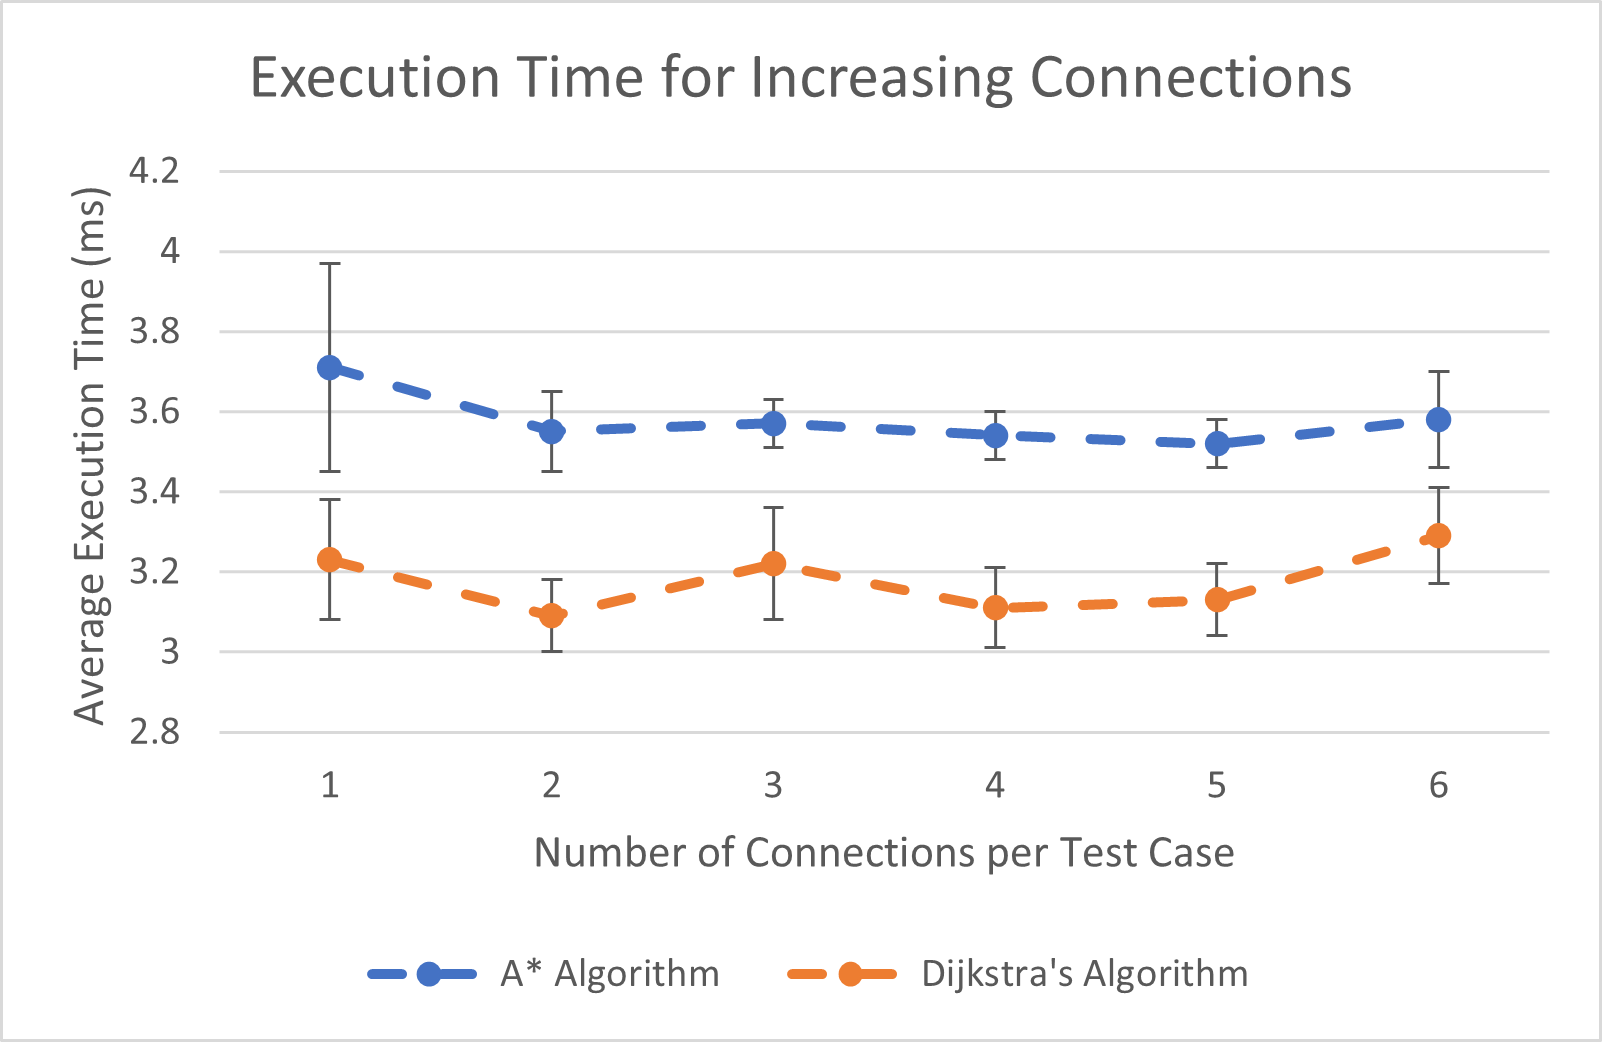

### Reflecting on the data
The number of connections refers to how many stops the rail line passes from point A to point B. As we increase the number of stops without switching lines, there seems to be no drastic change in the execution time of either algorithm. We can extrapolate these results to infer that regardless of path distance, the algorithms perform a similar, if not the same amount of operations. The data makes sense with Djikstras as it solves the single source shortest path problem and for A* since it is a heuristic approach to Djikstra's. In a practical application, it would be possible to precompute all single source shortest paths from each node for a total running time of O(N^2). If our priority queue was implemented using a minheap, this could be reduced to O(N\*Log(N)). To conclude, for a sparse graph, it would be feasible to precompute all single source shortest paths for long-term use in some applications. In the case of something like a subway system, it would be safe to assume the graph doesn't change except with the occasional maintenance of certain lines.

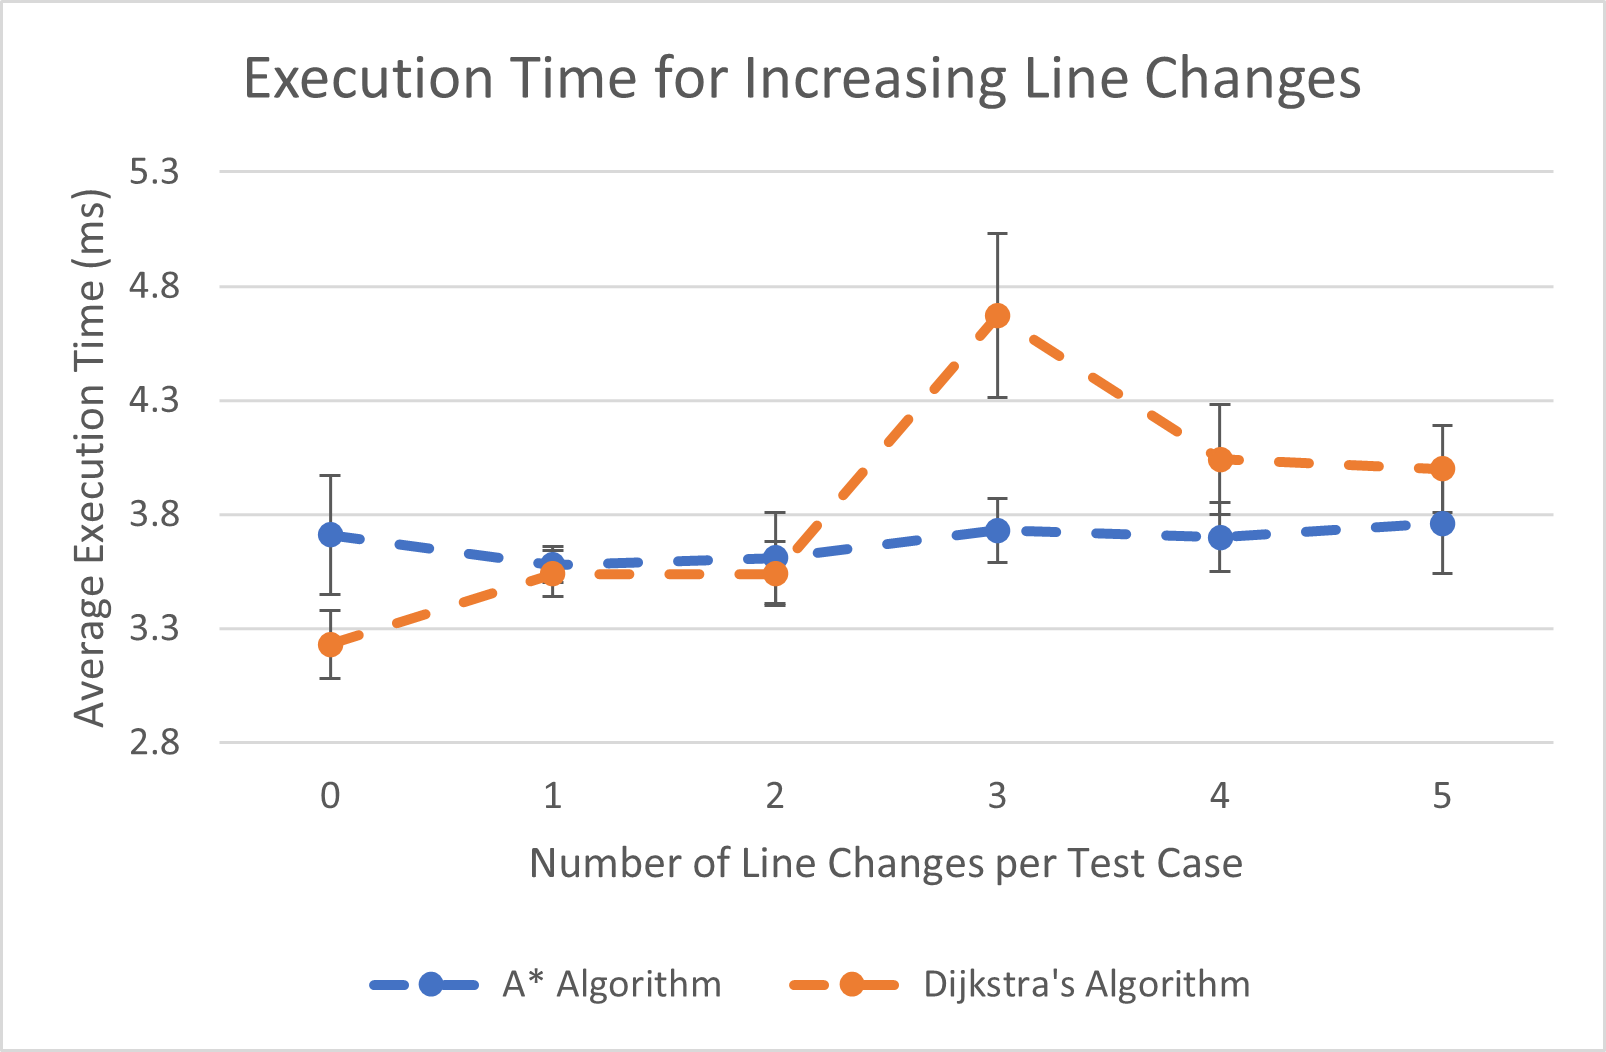

### Reflecting on the data
From the above graphs, line changes per test case indicates the number lines changes on the shortest path(i.e. going from line 2 to line 4), in order to get from the starting station to the final destination. It is interesting to note that this second graph definitely contradicts the first one, highlighting that there are applications for which the A* algorithm would be beneficial to use over Dijkstra's. If it is known that the incoming dataset/station map includes many lines with the majority of those stations being exclusively accessible on a small amount of those lines, then it seems that the A* search algorithm would provide a more efficient solution to the shortest path problem. We suspect the reason behind this result is due to the fact that A* computes the shortest path using the heuristic approach (physical distance between stations) prior to comparing connections, and as such, determines the shortest path with line changes faster than Dijkstra's - which always compares connections and looks for minimal line changes first.

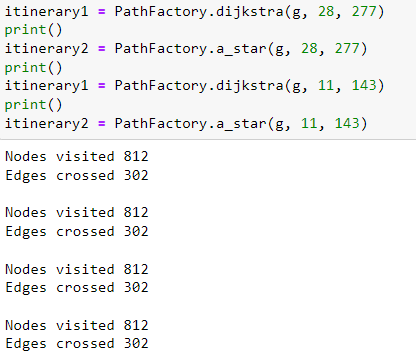

### Reflecting on the data
The number of nodes and edges traversed during every run of either algorithm is always the same. 812 edges is double the amount of connections present and 302 is the number of stations (vertices) in the graph. This means the algorithm crosses every edge once and visits every station twice. With this data we can conclude that regardless of the solution size (path size), there will always be an overhead cost proportional to (2E + V). Where E and V represent edges and nodes in the graph

### Why we chose these test cases and KPIs.
Nodes visited, edges crossed, and execution time were the chosen KPIs for this week's problems. Nodes visited and edges crossed provide us insight on our solution in respect to the size of the graph (vertices and edges). Execution time allows us to understand how feasible it would be to consistently compute shortest paths using our algorithm and if in a business application, would we be able to satisfy some hypothetical demand of X shortest paths computed/second.

### Division of Work
#### Jinal
Benchmarking, test suite, a* algorithm, graphing benchmarking results
#### Maged
Graph & itinerary generation, djikstras, class diagram.
#### Together
Reflection and analysis


# Week 2: Planning

## Subway Patrol

The subway patrol problem requires that given a subset of stations, compute the shortest cycle that contains all the stations. The application of this would be to provide subway patrols with the shortest route to complete their patrol.
This problem is similar to the travelling sales man problem, to solve this our team used a brute force approach.

In [6]:
from subway_patrol.SubwayPatrol import SubwayPatrol

pathToStations = "_dataset/london.stations.csv"
pathToConnections = "_dataset/london.connections.csv"
g = GraphBuilder.build(pathToStations, pathToConnections)

i1 = SubwayPatrol.travellingSalesmanProblem(g, [15, 32])
i2 = SubwayPatrol.travellingSalesmanProblem(g, [15, 32, 36])
# Each array in path correspondes to [src, line, edgeweight] so while it appears that the final
# vertex is missing, it is represented by "take line 78 line 4 for 4 stops"
print(i1.path)
print(i1.finish)
print()
print(i2.path)
print(i2.finish)

[[15, 4.0, 4], [78, 2.0, 4], [270, 2.0, 4], [200, 2.0, 4], [289, 3.0, 7], [247, 2.0, 13], [204, 2.0, 13], [32, 2.0, 13], [204, 2.0, 13], [247, 3.0, 7], [289, 2.0, 4], [200, 2.0, 4], [270, 2.0, 4], [78, 4.0, 4]]
15

[[15, 4.0, 4], [78, 2.0, 4], [270, 2.0, 4], [200, 2.0, 4], [289, 3.0, 7], [247, 2.0, 13], [204, 2.0, 13], [32, 2.0, 13], [204, 2.0, 13], [247, 3.0, 7], [289, 2.0, 4], [36, 2.0, 4], [289, 2.0, 4], [200, 2.0, 4], [270, 2.0, 4], [78, 4.0, 4]]
15


### Why this approach?
The travelling salesman problem is a proven NP-Hard problem and implementing a more complex solution to reduce the running time would in our opinion, be more trouble than it's worth. As of now, our solution can handle a subgraph of size 7 (potentially 8 on stronger systems). Since this algorithm is to be used by the officers of the subway system and not users trying to find a path in a short amount of time, it's acceptable for this algorithm to take a considerable amount of time as the officers patrol will most likely not change throughout the day and will be already decided before they start working.

### Running time analysis
Our approach to the Subway Patrol problem can be broken down into the following steps:

    1) Compute all permutations of the of the subset of stations. The subset of stations are just an array of integers and
       computing all permutations takes O(N\*N!) time, where N is the size of the subset.
       
    2) For each permutation, compute the shortest path along all the paths. EX: if the permutation was (5,101,38), compute
       the shortest path from station 5 to 101, then 101 to 38. The itineraries are then combined using a combign itinerary 
       method present in the class. Therefore, each permutation takes (N-1)\*(Running time of the shortest path)
       
    3) For each itinerary present (should be N!), find one with the shortest path. Each itinerary has a variable in it
        storing the total path length, so we just have to iterate over N! itineraries and its finished.
 
 We can approximate the running time to be proportional to step 2, as that is where all of the logic takes place. In total the approximate running time is O(N!\*(N-1)\*(E+V))

### Benchmark results
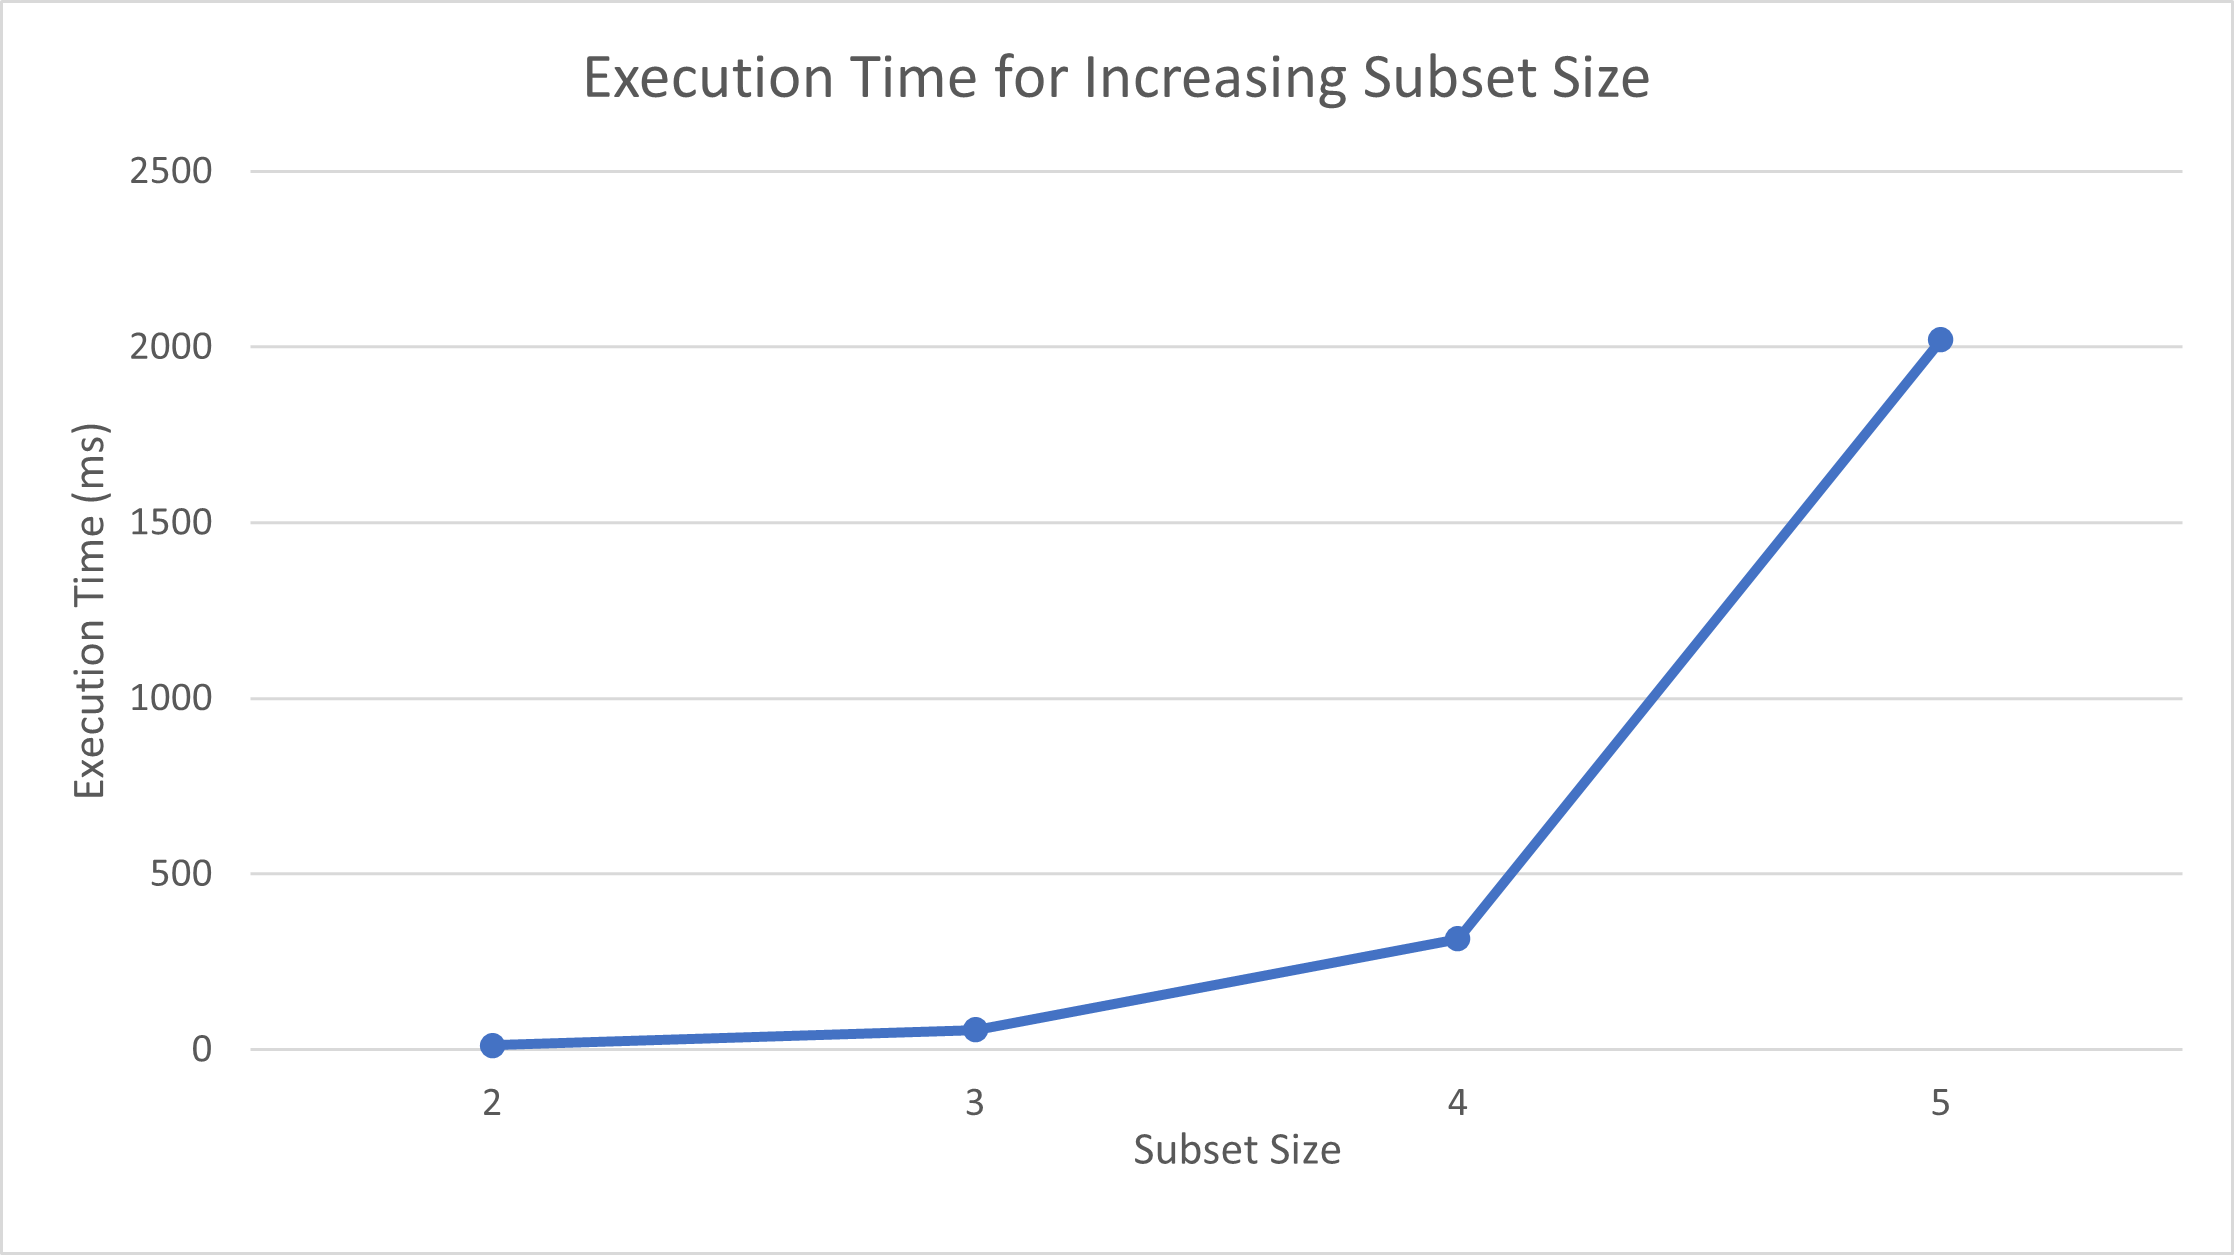

## Urbanism Planning

London's network is organized into different zones. This week's second problem required us to indentify how these zones are connected to each other and to identify "transportation islands".

Transportation islands can be best described as a set of stations that can be reached without switching zones.

### Finding the transportation island's 

To find transportation islands we begin by finding out which stations are in which zone using the metricsExtractor

In [7]:
pathToStations = "_dataset/london.stations.csv"
pathToConnections = "_dataset/london.connections.csv"
g = GraphBuilder.build(pathToStations,pathToConnections)
zone_list = MetricsExtractor.return_zone_list(g) 

In [8]:
# Print all stations in each zone
for zone in zone_list:
    print("Zone {} has stations:".format(zone))
    print(zone_list[zone])
    print()

Zone 3 has stations:
{1, 257, 258, 260, 8, 265, 266, 12, 270, 274, 19, 20, 152, 153, 26, 286, 160, 289, 34, 36, 297, 298, 299, 172, 300, 43, 303, 176, 52, 181, 182, 183, 56, 59, 63, 64, 65, 194, 69, 71, 72, 73, 200, 203, 204, 77, 79, 80, 86, 217, 219, 224, 97, 100, 231, 234, 106, 108, 111, 112, 113, 246, 247, 124}

Zone 1 has stations:
{2, 3, 259, 133, 262, 7, 263, 11, 13, 14, 145, 18, 146, 148, 149, 273, 151, 277, 25, 279, 28, 29, 156, 157, 285, 161, 162, 163, 166, 167, 44, 48, 49, 60, 188, 192, 193, 197, 198, 208, 82, 83, 212, 87, 89, 90, 92, 223, 99, 229, 102, 104, 233, 250, 107, 236, 248, 122, 126, 255}

Zone 2 has stations:
{4, 8, 10, 17, 22, 23, 24, 27, 32, 33, 35, 36, 39, 40, 41, 42, 47, 54, 55, 56, 61, 64, 69, 70, 74, 76, 79, 80, 84, 86, 94, 95, 96, 101, 106, 110, 111, 120, 123, 127, 128, 135, 136, 137, 138, 139, 142, 143, 147, 150, 152, 155, 159, 160, 164, 170, 171, 174, 175, 181, 183, 186, 191, 195, 201, 204, 205, 206, 209, 216, 218, 225, 226, 227, 228, 238, 242, 244, 245, 24

After returning the zone list, we compute the connected components for each zone

In [9]:
from connected_components.ConnectedComponents import connectedComponents

In [10]:
g.cc = connectedComponents.returnCC(g,zone_list)

In [11]:
# Print all transportation islands per zone
for zone in g.cc:
    print("Zone {} has stations:".format(zone))
    print(g.cc[zone])
    print()

Zone 3 has stations:
[[1, 52, 73, 234, 265, 265, 108, 108, 234, 176, 176, 73, 72, 182, 182, 194, 194, 72, 286, 286, 181, 181, 112, 112, 52], [257, 12, 258, 258, 59, 59, 12, 56, 56], [260, 26, 224, 224, 26, 274, 274], [8, 124, 124, 77, 77], [266, 160, 303, 303, 160], [270, 200, 200, 289, 289, 36, 43, 247, 247, 153, 204, 204, 153, 43, 79, 219, 183, 183, 219, 63, 63, 203, 203, 217, 217, 20, 20, 65, 65, 97, 97, 19, 19, 79, 36], [152, 86, 86, 69, 69, 106, 106, 64, 64], [34, 100, 100, 111, 111], [297, 71, 71, 172, 172], [298, 113, 113, 246, 246], [299, 300, 300, 231, 231, 80, 80]]

Zone 1 has stations:
[[2, 156, 263, 263, 166, 3, 3, 166, 44, 44, 161, 161, 25, 25, 255, 255, 87, 87, 49, 279, 285, 285, 248, 107, 107, 28, 133, 197, 192, 273, 273, 229, 198, 198, 229, 236, 236, 99, 146, 146, 99, 122, 122, 192, 212, 259, 277, 277, 89, 102, 102, 89, 145, 145, 90, 92, 7, 223, 223, 126, 126, 48, 60, 60, 151, 151, 48, 250, 250, 13, 13, 157, 167, 167, 14, 188, 188, 14, 157, 233, 29, 29, 233, 7, 92, 90, 

### Relating Zones 

In [12]:
crossing_edges = connectedComponents.generateCrossingEdgesBetweenZones(g)
for zone in crossing_edges:
    print("Zone {} can reach...:".format(zone))
    for crossing_edge in crossing_edges[zone]:
        print("    Zone {} by using {} to get to {}".format(crossing_edge[2],crossing_edge[0],crossing_edge[1]))
    print()

Zone 3 can reach...:
    Zone 2 by using 1 to get to 265
    Zone 2 by using 8 to get to 264
    Zone 2 by using 265 to get to 242
    Zone 2 by using 265 to get to 110
    Zone 2 by using 266 to get to 160
    Zone 2 by using 12 to get to 56
    Zone 4 by using 270 to get to 78
    Zone 4 by using 270 to get to 78
    Zone 2 by using 152 to get to 86
    Zone 4 by using 153 to get to 154
    Zone 2 by using 286 to get to 181
    Zone 2 by using 160 to get to 95
    Zone 2 by using 289 to get to 36
    Zone 2 by using 289 to get to 36
    Zone 4 by using 34 to get to 119
    Zone 2 by using 36 to get to 33
    Zone 2 by using 36 to get to 33
    Zone 2 by using 297 to get to 142
    Zone 2 by using 298 to get to 137
    Zone 4 by using 172 to get to 282
    Zone 2 by using 43 to get to 79
    Zone 2 by using 43 to get to 183
    Zone 4 by using 303 to get to 31
    Zone 4 by using 176 to get to 30
    Zone 2 by using 52 to get to 265
    Zone 2 by using 181 to get to 76
    Zone 2 by u

### Relating Islands 

We relate transportation islands by creating a "component graph" that is, a graph in which every node in it is a connected component. The names of the connected components are arbitrary and the nodes only relevant informations are their adjacency lists and zones. 
To find out which stations are in which components, we have a dictionary which at any station ID, returns a list of components containing that station. Note most stations are only in one component, but some are in two

In [13]:
componentsHolding,graph_of_components = GraphBuilder.buildComponentGraph(g,g.cc)
for component in graph_of_components.graph:
    print("Component {} connects to:".format(component))
    for edge in graph_of_components.graph[component].connections:
        print("Component {} using station {} to station {}".format(edge[0],edge[1],edge[2]))
    print()

Component 0 connects to:
Component 16 using station 1 to station 265
Component 16 using station 52 to station 265
Component 16 using station 265 to station 242
Component 16 using station 265 to station 110
Component 26 using station 108 to station 141
Component 16 using station 108 to station 265
Component 21 using station 176 to station 30
Component 22 using station 194 to station 5
Component 18 using station 286 to station 181
Component 18 using station 181 to station 76
Component 18 using station 112 to station 181
Component 32 using station 112 to station 196

Component 1 connects to:
Component 17 using station 12 to station 56
Component 31 using station 59 to station 240
Component 17 using station 56 to station 54

Component 2 connects to:
Component 15 using station 224 to station 95

Component 3 connects to:
Component 14 using station 8 to station 264
Component 14 using station 124 to station 8
Component 23 using station 77 to station 93

Component 4 connects to:
Component 15 usi

Note the adjacancy matrix is modified from the original format of 
[dest, line, edge_weight] to 
[dest_component, starting_station, ending_station]

In [14]:
# To check which zones you must pass while travelling, simply find the shortest path and compare
# the zones of each vertex in the path

pathToStations = "_dataset/london.stations.csv"
pathToConnections = "_dataset/london.connections.csv"
g = GraphBuilder.build(pathToStations,pathToConnections)
itin1 = PathFactory.dijkstra(g,11,283)

zones = set()
for i in itin1.path:
    zones.add(g.graph[i[0]].zone)
zones.add(g.graph[itin1.finish].zone)
print(zones)

{1.0, 2.0}


### Runtime analysis of connected components

#### Finding connected components
Finding connected components looks at each node in each zone and runs DFSUtil on it. DFSUtil utilizes a stack to look through all neighbours of every node, giving it a running time proportional to O(V+E). Therefore the total running time would be O(V(E+N))
#### Finding crossing edges between zones
Finding crossings edges between zones has the algorithm look through every nodes components and check its edges and compare if its in the same zone as its neighbours. This has a runtime proportional to O(V+E)
#### Generating components graph
Again this looks at every node and checks if the component its neighbours belongs to is different than its own. This problem compares zones a total of (N+E) times. 


### Bencmark Results
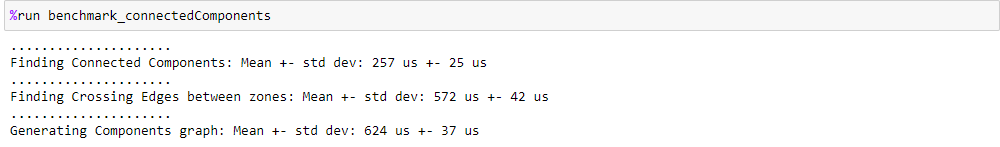

## Updated UML Diagram
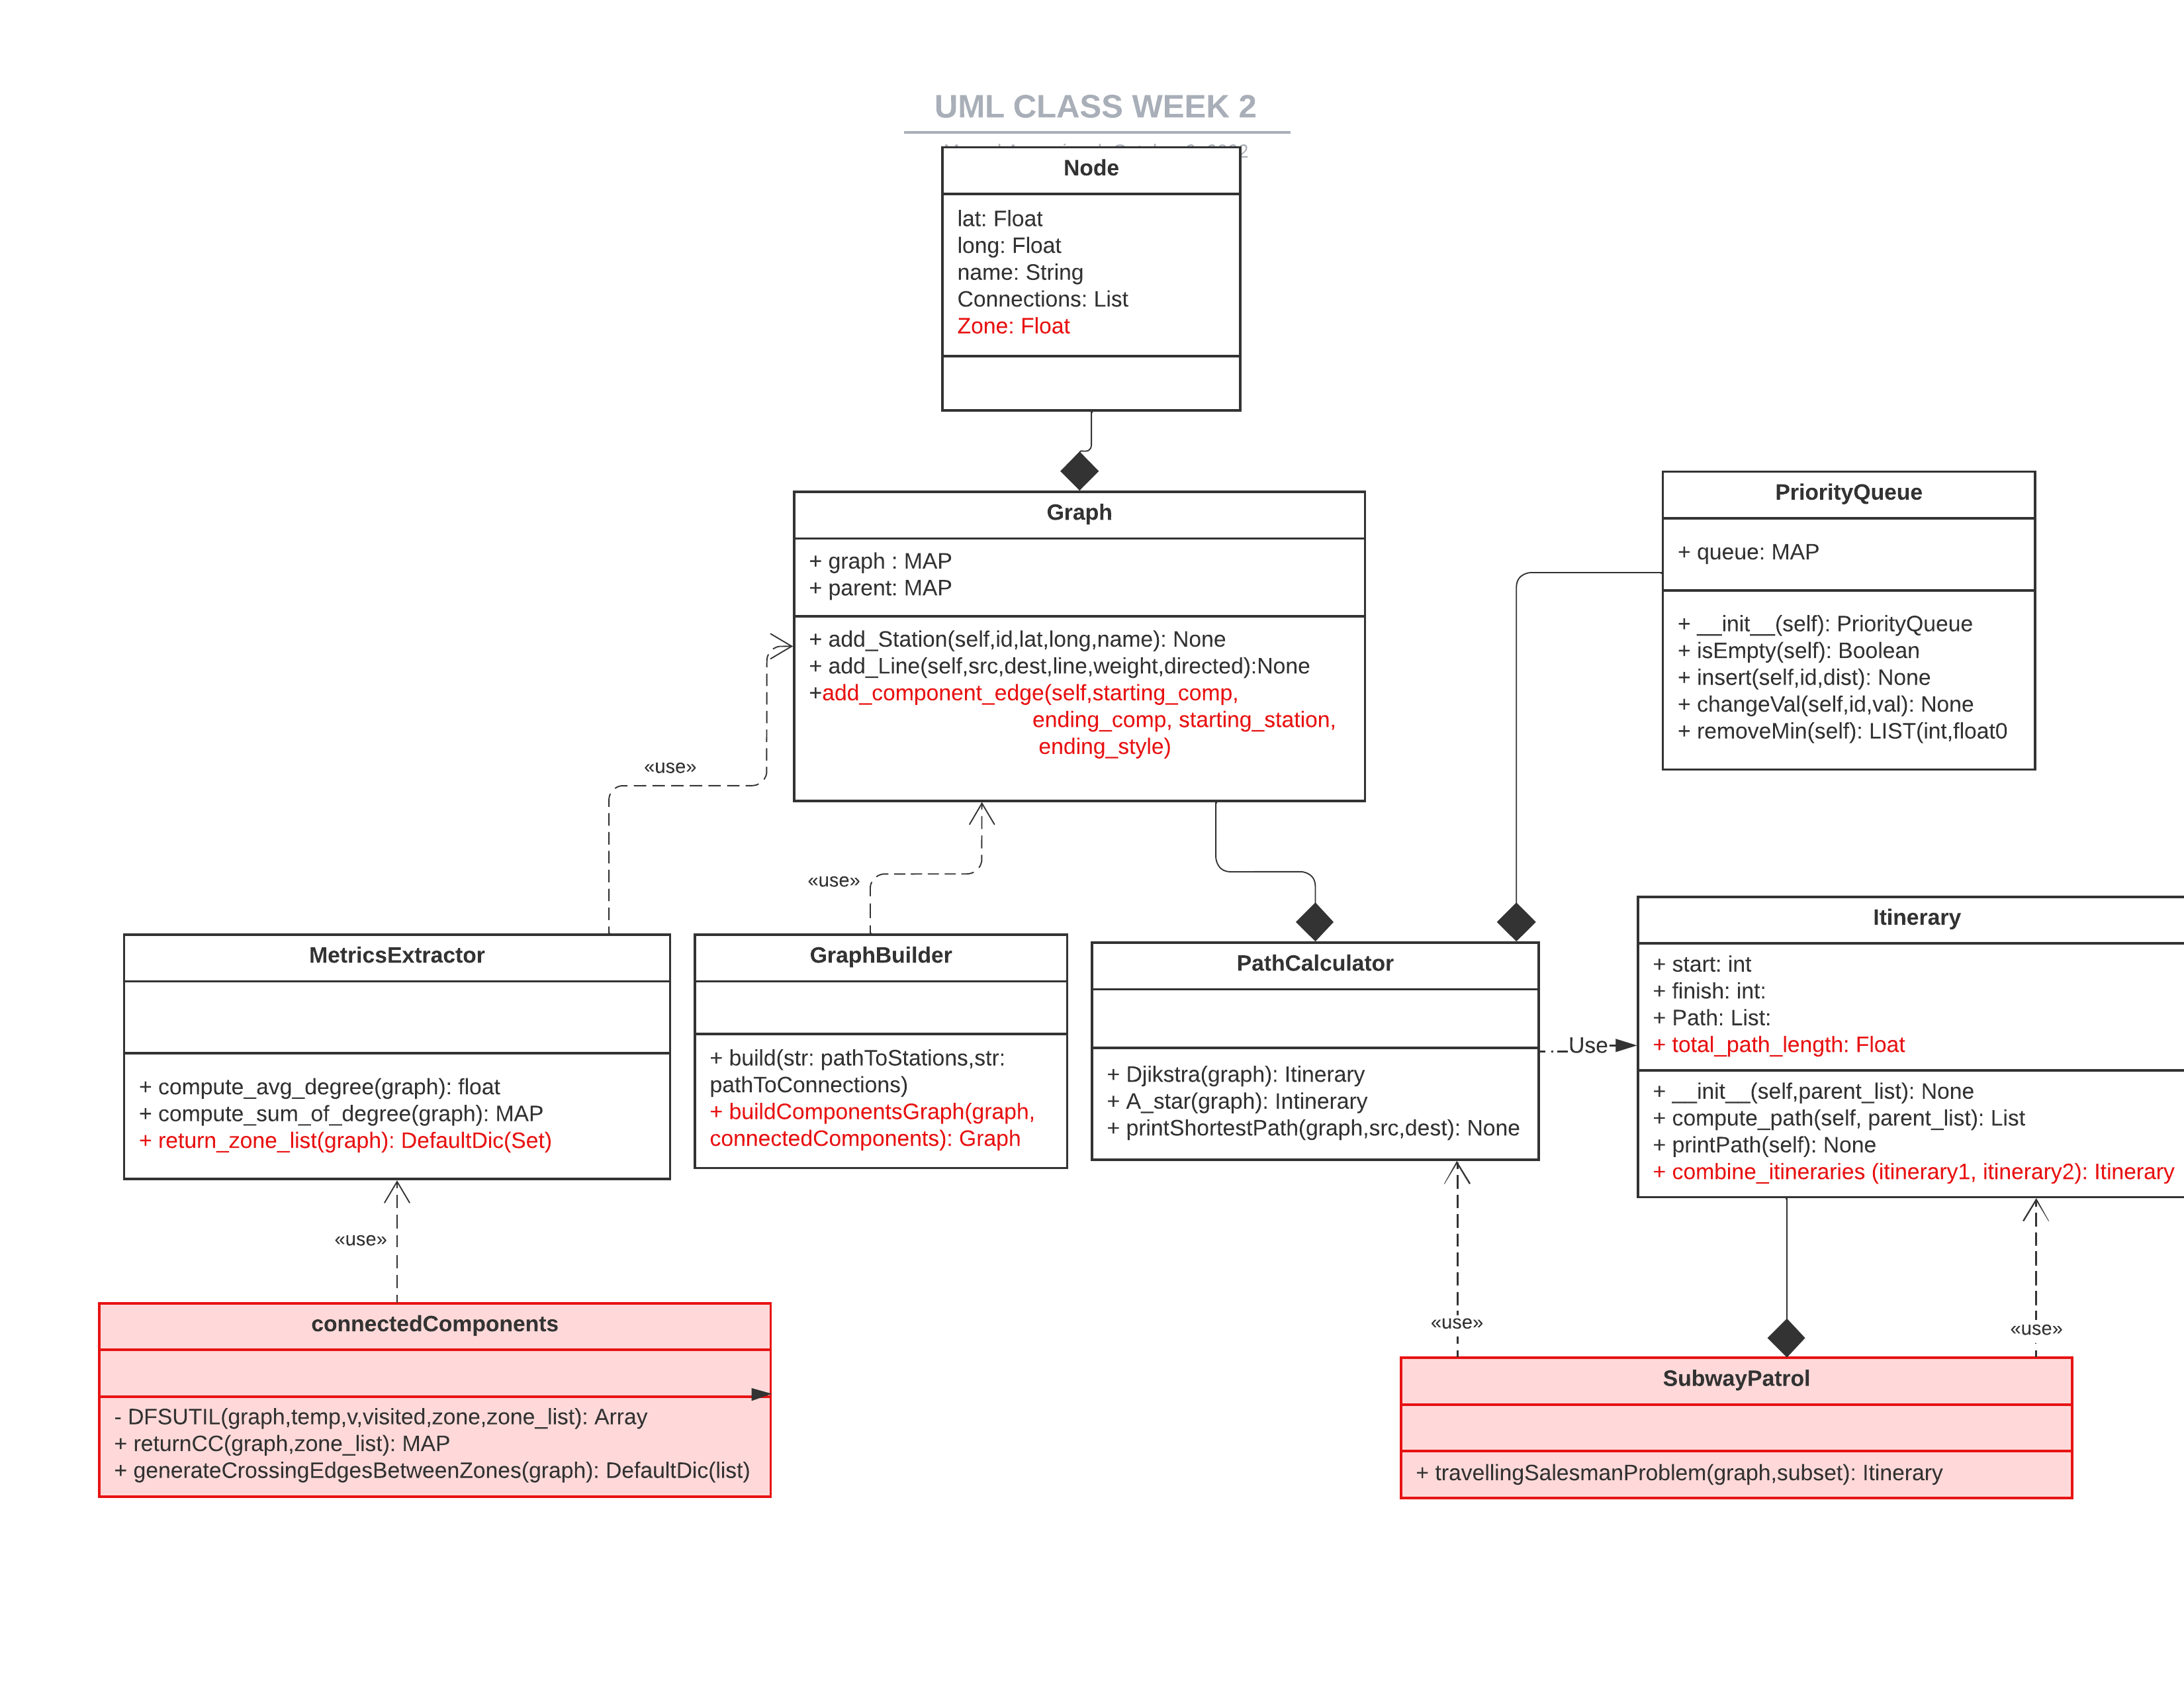

Two new classes added were connectedComponents and SubwayPatrol. Connected components returns Arrays, Maps, and dictionaries depending on the method called. It Uses metrics extractor to compute which nodes are in which zone and has no other dependancies. 
Sunway patrol has an itinerary which it consistently updates and uses PathFactory to find the shortest paths for each permutation.

MetricsExtractor, Graph, GraphBuilder, Node, and Itinerary all got some additional features. 

Metrics extractor can now return which nodes are in which zones. This was implemented to help solve the connected components problem.

GraphBuilder can now build a components graph. This is done using a method which when given a normal graph and a set of connected components, creates a graph where each component is a vertex. 
Graph

Graph now has a new method called add_component_edge. This method is used for components graphs. Component graphs have different representations of edges than traditional graphs, so a new method was created to accomodate that.

Itinerary now has an additional variable called total_path_length and a new method, combignItineraries. total_path_length stores the total path length of the current instance and is used by SubwayPatrol to quickly calculate the shortest path. CombignItineraries is used by SubwayPatrol to create a cycle including all stations in the subset. (See our detailed explanation on SubwayPatrol). 

### Discussion of SOLID design principles
SOLID design is an acronym incorperating 5 design principles. These principles are Single-responsibility, open-closed priniciple, Liskovs substitution principles, interface segregation, and dependancy inversion.

The tworinciples we are most concerned with are single-responsibility and open-closed.
Single-responsibility states a class should only have one responsibility, in our case all our classes meet this criteria. This can be easily seen in classes like graphBuilder and PathFactory which build graphs and itineraries respectively.

Open-closed principle states that a module can be open for extension and closed for modification. Between weeks 1 and 2, we added various features to multiple of our classes and even added new classes themselves. This demonstrates our code follows the open-closed principle since without modifying old cold, we extended the features of existing modules. Some new features we added included the generation of components graphs and the ability to merge itineraries. 


# Reflection Jinal

## Backward
In terms of applying knowledge learned in the past (specifically regarding algorithms), I have not had much experience with similar work. However, the content that was discussed and eventually applied related to topics learned in previous software engineering courses such as 2C03 (Algorithms & Data Structures), and 2AA4 (Introduction to Software Development). This is not surprising as the name of this course is "Binding Theory to Practice" so it's nice to see the connection between the theory discussed in courses prior, to the application of that learning in this course.


## Inward
Overall, I feel grateful to have gone through the process of creating this work, as this is the first time I've had the task of providing a programming solution to an open-ended problem, but I will say that there are aspects of the final product that are undesirable and could have been improved. Before I get into that though, I would like to say that graphing the benchmarking results for the first week (a* vs. dijkstra) was something that I enjoyed doing, and am proud of the result since it depicted the differences between the two algorithms with different inputs. In terms of dislikes for the project, I would say the main one would have to be the efficiency with some of the implementations - specifically for subway patrol. Although I understand that this is an np-hard problem, the solution that we came up with seems quite trivial. As discussed previously in the report, we felt like the work that we had to put in to improve it would outweigh the overall gains in performance. However, if we did have more time, I believe it would have been interesting to have been able to try and engineer a more efficient solution.


## Outward
One thing that I want people to particularly notice about my work is the compatibility with SOLID principles. I think the time that was taken to ensure that all of the modules were separate in their folders and files (single responsibility) and further ensure that each module only accessed the features that were required from the others (dependency inversion). It was a time-consuming process to ensure that these principles were followed, and I believe that it should be showcased and apparent when looking at the code from an outward perspective.

## Forward
 If I had the chance to do this project over again, I would spend more time in the beginning (during week one) focusing on laying the groundwork for the coding environment, ensuring that it could be easily extendable. I think this is something that we had difficulty with during the end of week 1, and resulted in more work, and having to refactor the code to meet the SOLID criteria. In addition, I think there was a lot of focus on the actual code itself, and it was mentioned in one of the lectures that although the code is important, the experience of engineering a solution was the goal of this lab and this course in general. So, I would try and focus less on the code and more on the steps that we took along the way to come to that solution. 

# Reflection Maged

## Backward
The most similar work I've done would be finding and computing the running times of Djikstra's algorithm and minimum heaps in SFWRENG 2C03, the data structures and algorithms course. I feel 2C03 was the prerequisite to this course and without it, I would have struggled a lot more. For reading CSV files, traveling salesman, and connected components, I was familiar with the problems from some Leetcode questions, but nothing more than knowing they existed.

For the analysis section of the analysis, SFWRENG 2AA4 software design principles where we learned about solid design principles except for Liskov's. 

I have had no prior experience with benchmarking. In hindsight, this isn't that good because as software engineers, we need to be able to gather data on our solutions to see if we've made efficient solutions. 

## Inward
I feel that this work was very beneficial to me. I haven't had a lot of experience implementing algorithms and coding, so to be given some problems to code out was fun. My favorite parts were developing classes for Graphs, Itineraries, and Nodes because there was so much freedom as to how I could implement them. I disliked the benchmarking and testing  as I didn't feel that there was a strong reference to test my code against. I wish that alongside the problems, sample inputs and outputs were provided to give us some direction while developing.

## Outward
One thing I want people to notice about the work in this lab is our implementation of the traveling salesman problem. While it may not have been implemented very efficiently (possibly slower than standard brute force methods), I feel that the code is surprisingly compact and readable. The reason for this is we already had other classes and methods to rely on. We created a method to merge itineraries for this problem. It made the solution so easy to implement, and I would like people to notice that.

## Forward
One thing I would change if we redid this project would be breaking down our code more. Initially, a lot of our code was in very few files. As the project got larger it became harder to figure out which file contained which piece of code. By the end of week 2, we separated our files and folders, as well as made our naming scheme more consistent, but if we did this from the start, we would have not only worked faster but not had to do it later. Aside from that though, I feel we did a great job throughout the lab. Our solutions are functional, and our code is well documented throughout the report and python files. 

## Week 3 Bonus

## Random Graph Generator

In [15]:
randomG = GraphBuilder.buildRandomGraph(11,5,uniform=True)
for i in randomG.graph:
    print(len(randomG.graph[i].connections))

5
5
5
5
5
5
6
5
5
5
5


In [16]:
randomG = GraphBuilder.buildRandomGraph(11,5,uniform=False)
for i in randomG.graph:
    print(len(randomG.graph[i].connections))

7
7
10
5
7
5
5
5
5
5
5
